<a href="https://colab.research.google.com/github/JessicaWiijaya/COVID_19/blob/main/COVID19_FULLGROUPED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pandas
import pandas as pd
# load dataset
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
dataset = '/drive/My Drive/COVID19/full_grouped.csv'

In [3]:
df = pd.read_csv(
    dataset)
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [4]:
df.shape

(35156, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


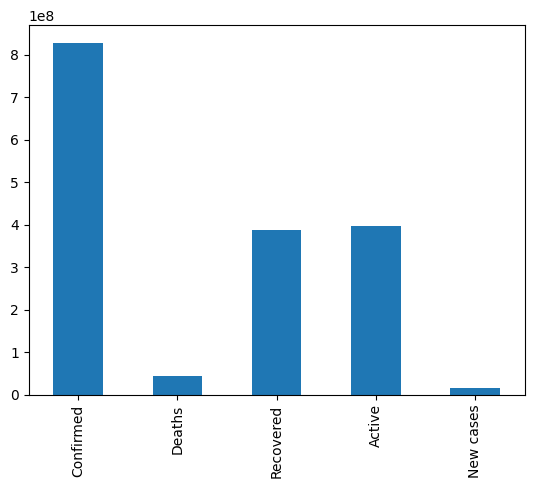

In [6]:
column_names = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases']

column_sums = df[column_names].sum().plot(kind="bar")

In [7]:
Region = df.groupby(by='WHO Region').sum()
Region

<ipython-input-7-db00aabce846>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Region = df.groupby(by='WHO Region').sum()


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
WHO Region,,,,,,,
Africa,21791827,439978,11193730,10158119,723540,12223,440645
Americas,402261194,19359292,157069444,225832458,8842455,342732,4468616
Eastern Mediterranean,74082892,1924029,48050703,24108160,1490854,38339,1201400
Europe,248879793,19271040,123202075,106406678,3316928,211144,1993723
South-East Asia,55118365,1458134,30030327,23629904,1835296,41349,1156933
Western Pacific,26374411,932430,18861950,6580031,291879,8232,206742


In [12]:
# df = df.drop(columns='Deaths')
df.drop(columns='Deaths', inplace=True) # menghapus kolom bernama 'Deaths'
df.head() # tampilkan 5 baris pertama

,Date,Country/Region,Confirmed,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,Africa


In [13]:
df.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [14]:
df.dtypes

Date              object
Country/Region    object
Confirmed          int64
Recovered          int64
Active             int64
New cases          int64
New deaths         int64
New recovered      int64
WHO Region        object
dtype: object

In [15]:
df.isna().values.any() #Mendeteksi keberadaan nilai yang kosong

False

In [16]:
df.drop_duplicates(inplace=True) # menghapus duplikasi data
df.shape

(35156, 9)

In [17]:
df.describe()

,Confirmed,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Confirmed,Recovered,Active,New cases,New deaths,New recovered
Confirmed,1.000000,0.894418,0.949940,0.893966,0.602815,0.675623
Recovered,0.894418,1.000000,0.710665,0.808816,0.515154,0.761926
Active,0.949940,0.710665,1.000000,0.846513,0.583212,0.534027
New cases,0.893966,0.808816,0.846513,1.000000,0.733583,0.725761
New deaths,0.602815,0.515154,0.583212,0.733583,1.000000,0.503319
New recovered,0.675623,0.761926,0.534027,0.725761,0.503319,1.000000


In [19]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline

<ipython-input-21-aec1994f8f9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= df.corr())


<Axes: >

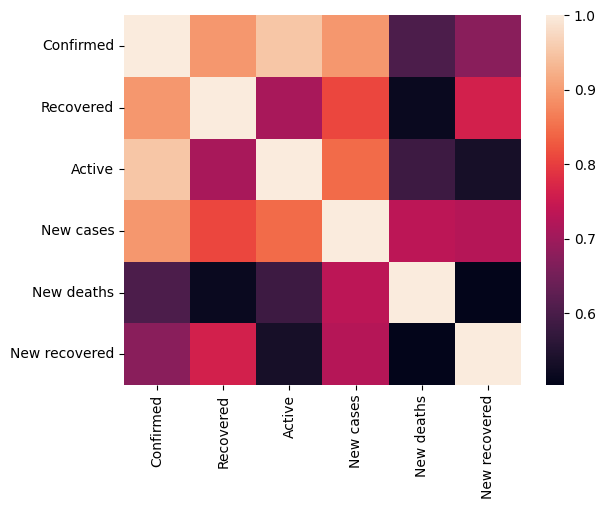

In [21]:
sns.heatmap(data= df.corr())

In [22]:
df['Recovered'].value_counts()

0        11645
1          840
2          535
8          309
4          267
         ...  
19195        1
11120        1
7407         1
3564         1
9959         1
Name: Recovered, Length: 7649, dtype: int64

In [23]:
df['WHO Region'].value_counts()

Europe                   10528
Africa                    9024
Americas                  6580
Eastern Mediterranean     4136
Western Pacific           3008
South-East Asia           1880
Name: WHO Region, dtype: int64

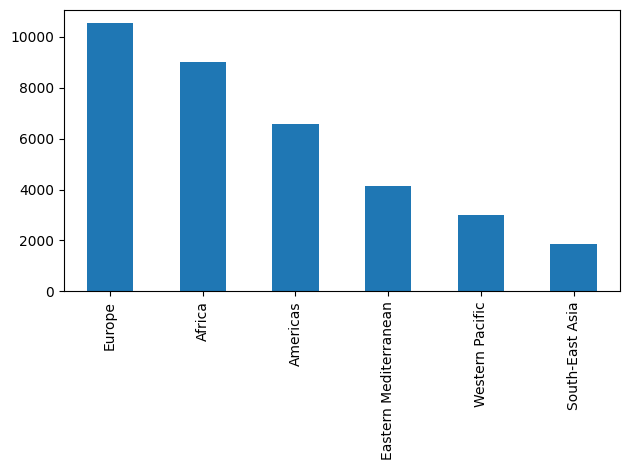

In [24]:
df['WHO Region'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

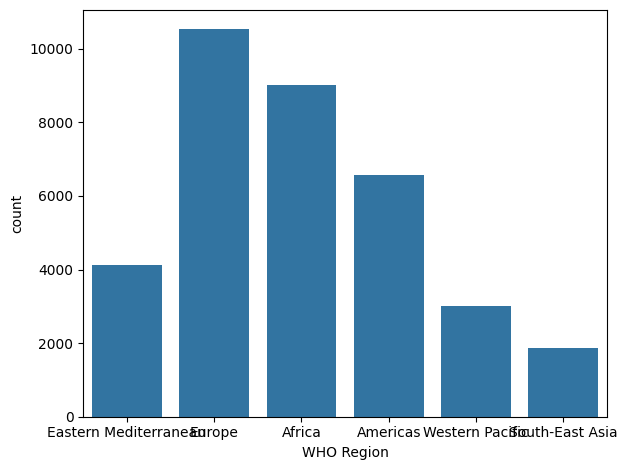

In [25]:
sns.countplot(data= df, x='WHO Region')
plt.tight_layout()
# sns.countplot?

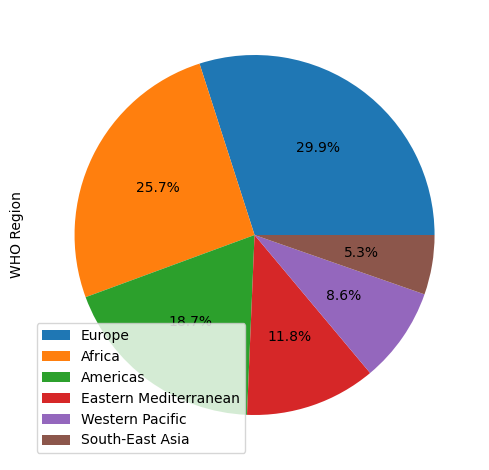

In [27]:
df['WHO Region'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True
                                        )
plt.tight_layout()

Text(0.5, 1.0, 'Recovered')

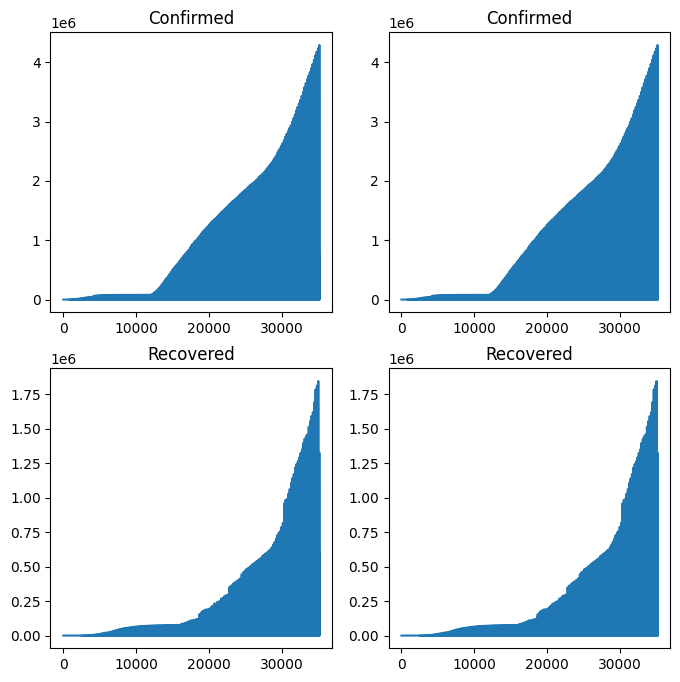

In [51]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

df['Confirmed'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Confirmed')

df['Confirmed'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Confirmed')

df.Recovered.plot.line(ax=ax[1][0])
ax[1][0].set_title('Recovered')

df.Recovered.plot.line(ax=ax[1][1])
ax[1][1].set_title('Recovered')

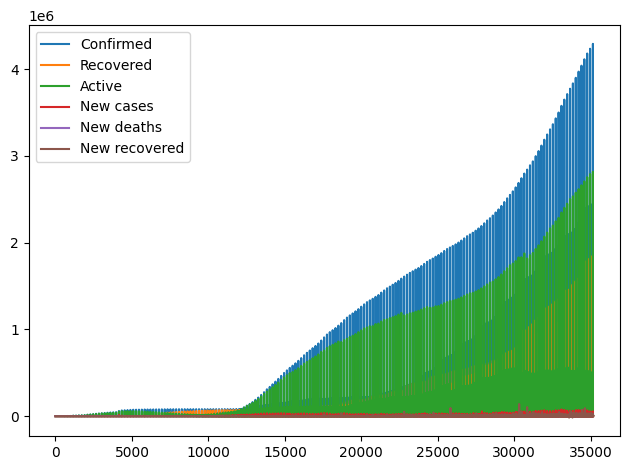

In [30]:
df.plot()
plt.tight_layout()

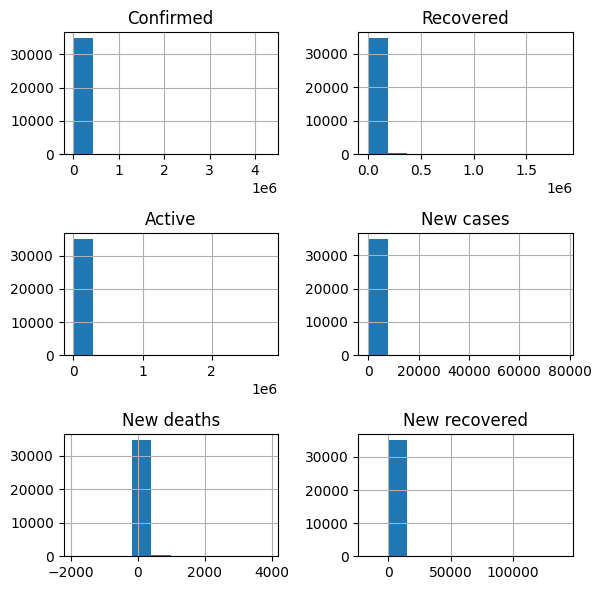

In [31]:
df.hist(figsize=(6,6), bins=10) #hist = histogram, bins=lebar datanya
plt.tight_layout()

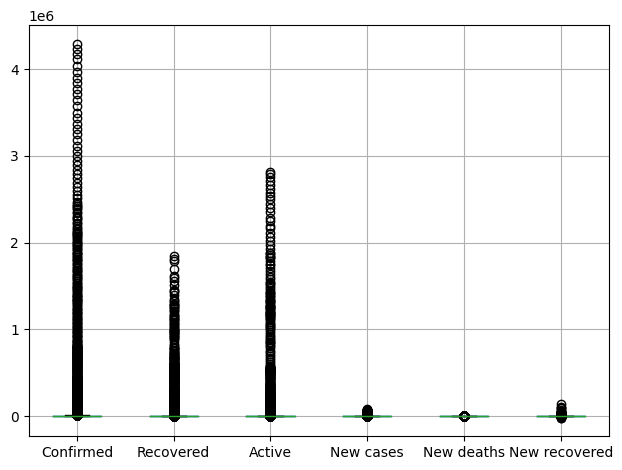

In [32]:
df.boxplot()
plt.tight_layout()

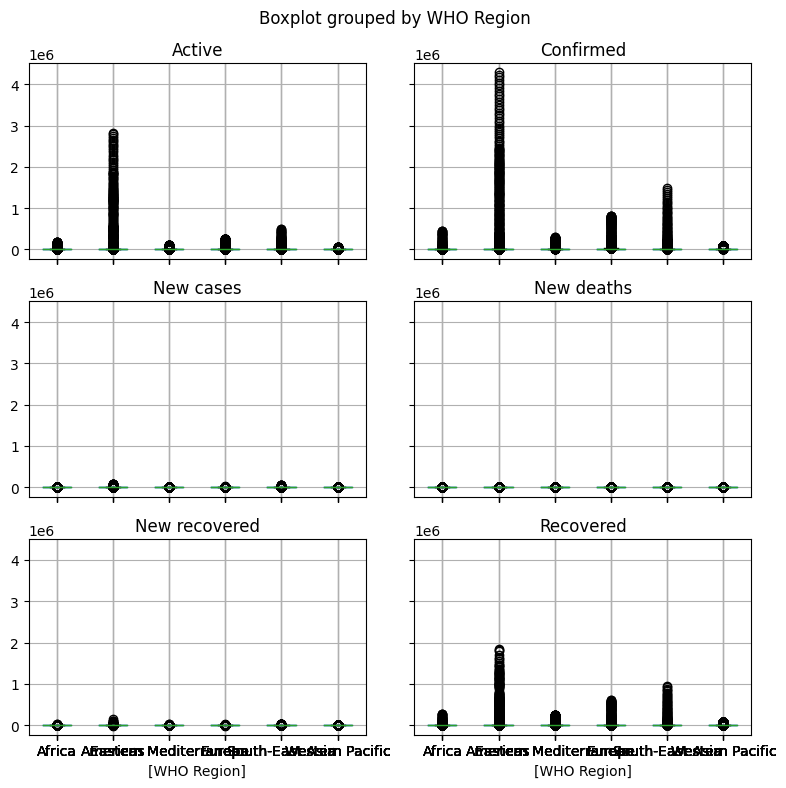

In [33]:
df.boxplot(by="WHO Region", figsize=(8,8))
plt.tight_layout()

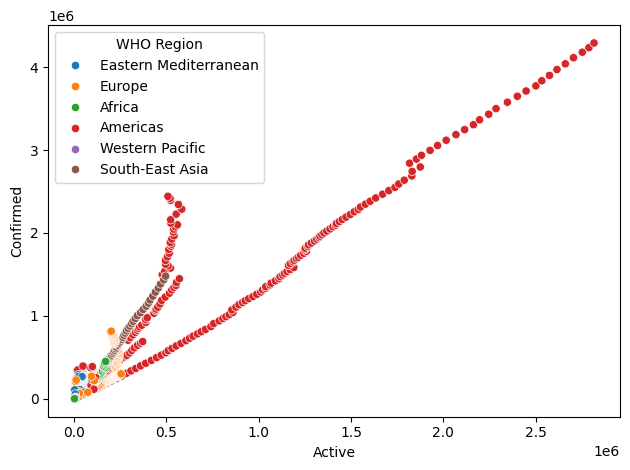

In [36]:
sns.scatterplot(x='Active', y='Confirmed', data= df, hue='WHO Region')
plt.tight_layout()

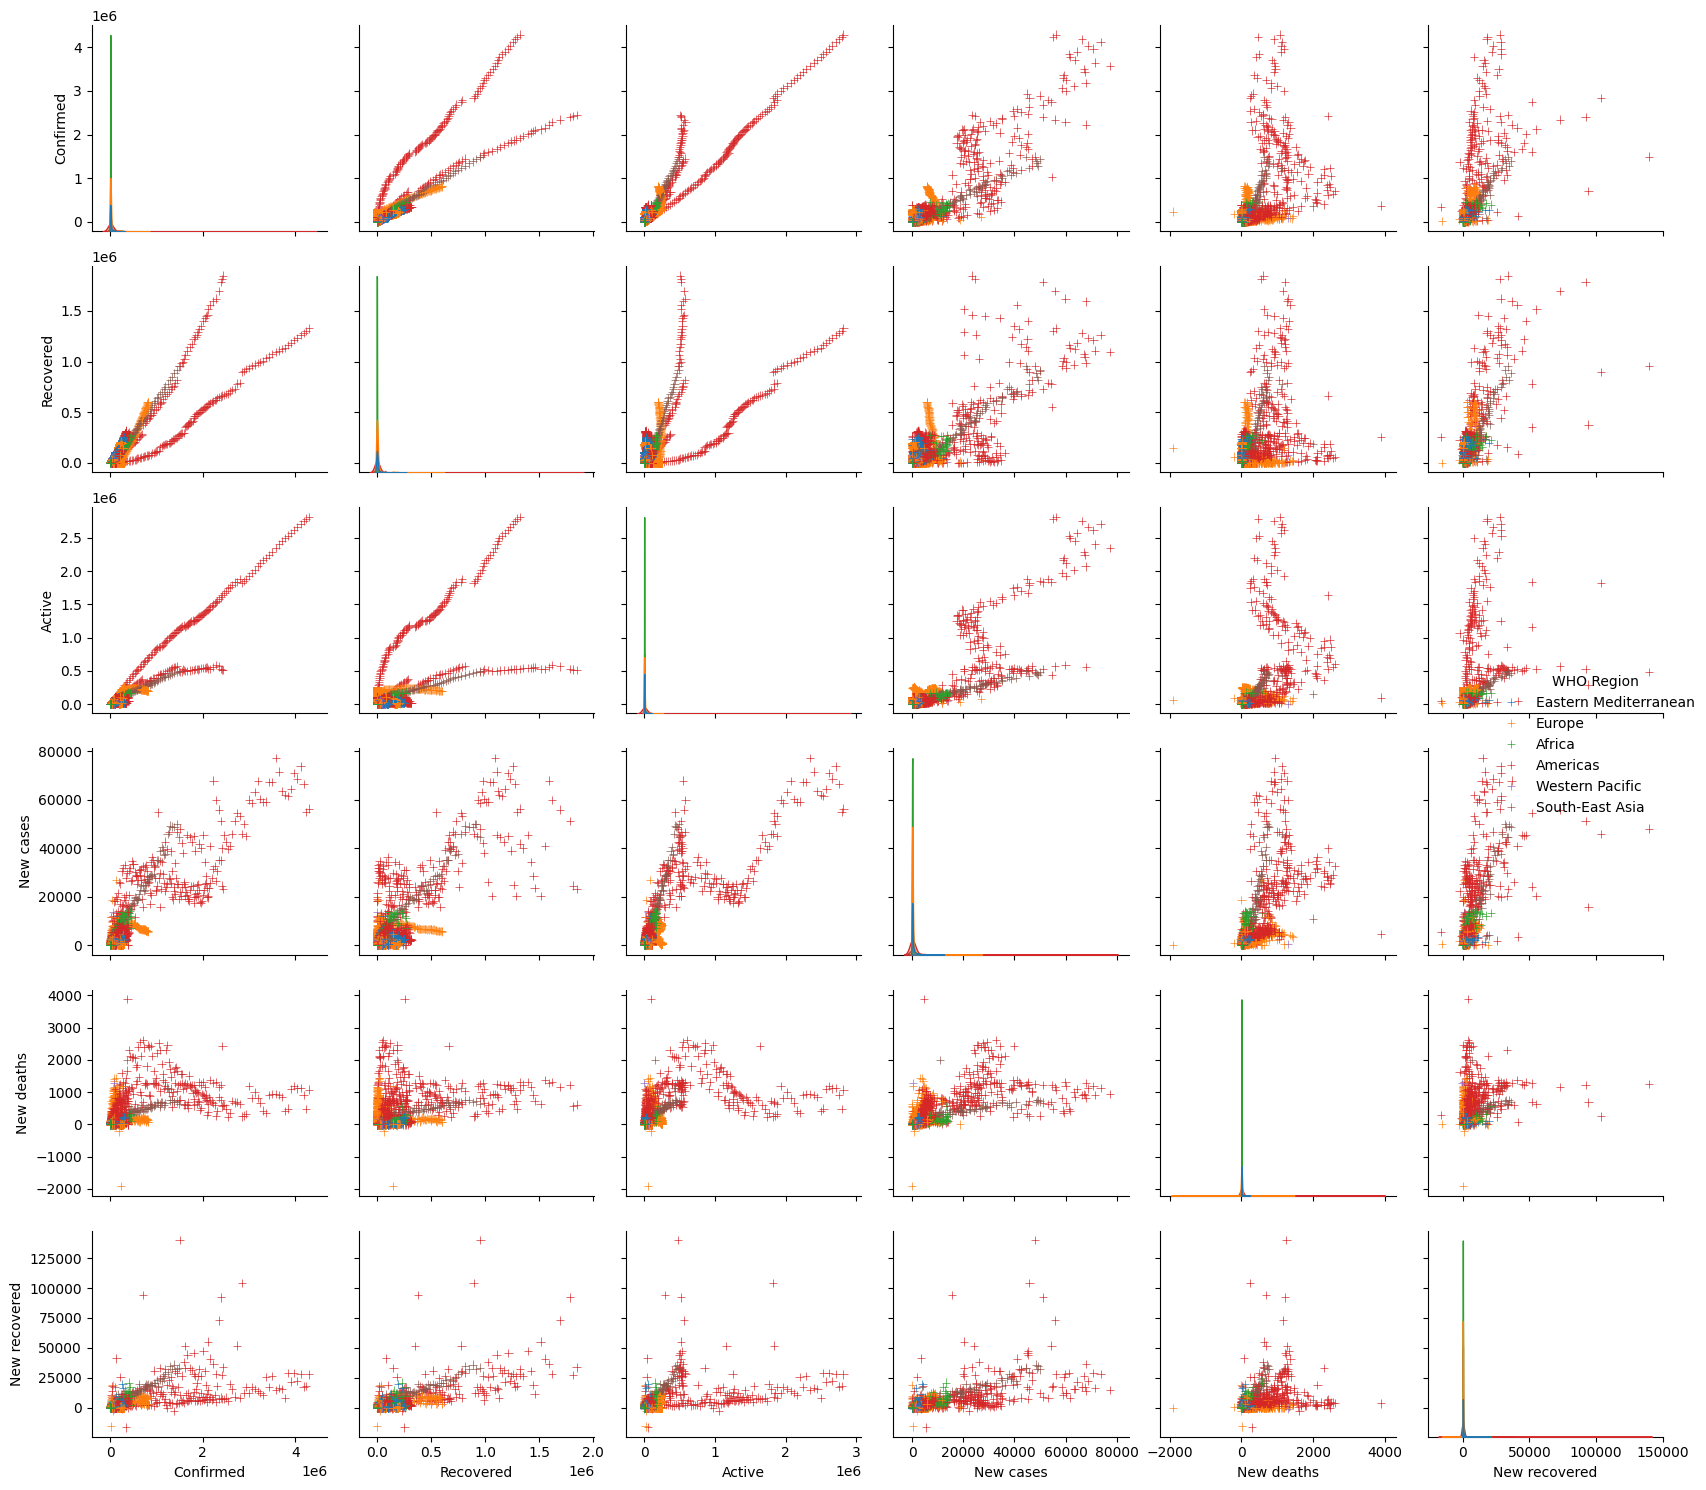

In [38]:
sns.pairplot( df, hue='WHO Region', markers='+')
plt.tight_layout()

In [39]:
from sklearn.model_selection import train_test_split # Iris dataset
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [40]:
X = df.drop(columns='WHO Region')
X.head() # tampilkan 5 baris pertama

,Date,Country/Region,Confirmed,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0


In [42]:
y = df['WHO Region']
y.head() # tampilkan 5 baris pertama

0    Eastern Mediterranean
1                   Europe
2                   Africa
3                   Europe
4                   Africa
Name: WHO Region, dtype: object

In [43]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(21093, 8)
(21093,)

testing dataset:
(14063, 8)
(14063,)
